# **파이토치 기본**

In [ ]:
import torch

In [ ]:
x= 3.5
y= x*x +2
print(x,y)

3.5 14.25


In [ ]:
x=torch.tensor(3.5)
y=x+3
print(x,y)

tensor(3.5000) tensor(6.5000)


In [ ]:
x=torch.tensor(3.5,requires_grad=True)
y=(x-1)*(x-2)*(x-3)
print(x,y)

tensor(3.5000, requires_grad=True) tensor(1.8750, grad_fn=<MulBackward0>)


In [ ]:
y.backward()
x.grad

tensor(5.7500)

In [ ]:
x=torch.tensor(3.5,requires_grad=True)
y=x*x
z=2*y+3

In [ ]:
z.backward()
x.grad

tensor(14.)

In [ ]:
a=torch.tensor(2.0,requires_grad=True)
b=torch.tensor(1.0,requires_grad=True)

x=2*a + 3*b
y=5*a*a+3*b*b*b
z=2*x+3*y

In [ ]:
z.backward()
a.grad , b.grad

(tensor(64.), tensor(33.))

# **파이토치로 만드는 첫 번째 신경망**

In [1]:
import torch
import pandas
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [2]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [3]:
df=pandas.read_csv('mount/My Drive/Colab Notebooks/gan_basic/mnist_train.csv',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


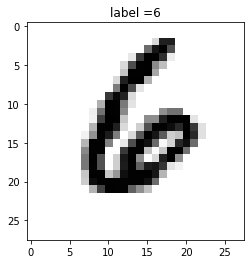

In [6]:
row = 13
data = df.iloc[row]
label = data[0]
img = data[1:].values.reshape(28,28)
plt.title("label =" +str(label))
plt.imshow(img,interpolation='none',cmap='binary')
plt.show()

In [23]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(784,200),
        nn.Sigmoid(),
        nn.Linear(200,10),
        nn.Sigmoid()
    )

    self.loss_function = nn.MSELoss()

    self.optimiser = torch.optim.SGD(self.parameters(),lr=0.01)
    
    self.counter=0
    self.progress =[]
    
    pass

  def forward(self, inputs):
    return self.model(inputs)

  def train(self,inputs,targets):
    outputs = self.forward(inputs)
    loss = self.loss_function(outputs,targets)
   
    
    self.counter +=1
    if(self.counter %10 ==0):
      self.progress.append(loss.item())
      pass
    if(self.counter %10000 ==0):
      print("counter=",self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    
    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))
    pass


  pass


In [10]:
class MnistDataset(Dataset):
  def __init__(self,csv_file):
    self.data_df = pandas.read_csv(csv_file,header=None)
    pass
  def __len__(self):
    return len(self.data_df)
  def __getitem__(self,index):
    label =self.data_df.iloc[index,0]
    target = torch.zeros((10))
    target[label]=1.0

    image_values= torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0
    return label,image_values,target

  def plot_image(self,index):
    img = self.data_df.iloc[index,1:].values.reshape(28,28)
    plt.title("label = "+ str(self.data_df.iloc[index,0]))
    plt.imshow(img,interpolation='none',cmap='binary')
    pass
  pass



In [11]:
mnist_dataset=MnistDataset('mount/My Drive/Colab Notebooks/gan_basic/mnist_train.csv')

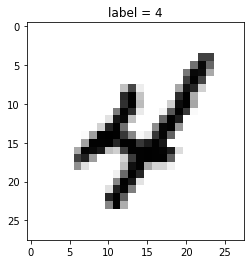

In [12]:
mnist_dataset.plot_image(9)

In [ ]:
mnist_dataset[100]

In [24]:
C=Classifier()

In [25]:
%%time

epochs = 3

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label,image_data_tensor,target_tensor in mnist_dataset:
    C.train(image_data_tensor,target_tensor)
    pass
  pass

training epoch 1 of 3
counter= 10000
counter= 20000
counter= 30000
counter= 40000
counter= 50000
counter= 60000
training epoch 2 of 3
counter= 70000
counter= 80000
counter= 90000
counter= 100000
counter= 110000
counter= 120000
training epoch 3 of 3
counter= 130000
counter= 140000
counter= 150000
counter= 160000
counter= 170000
counter= 180000
CPU times: user 3min 53s, sys: 2.3 s, total: 3min 56s
Wall time: 3min 55s


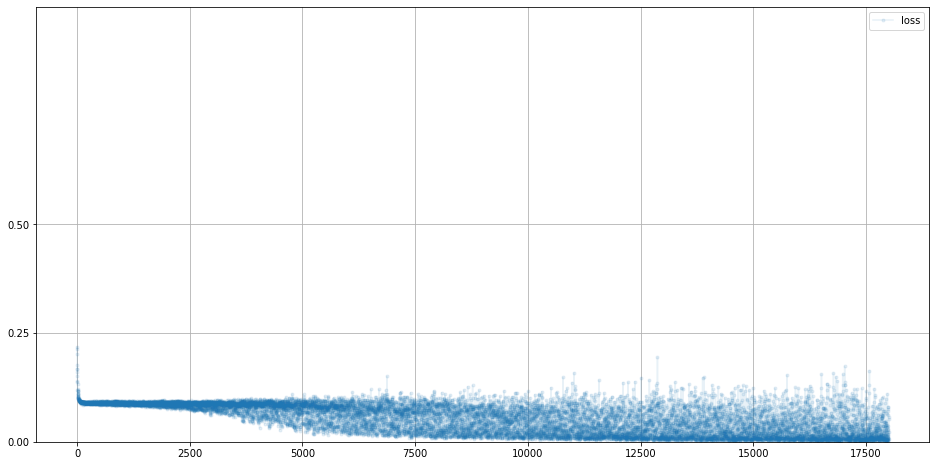

In [26]:
C.plot_progress()

In [27]:
mnist_test_dataset=MnistDataset('mount/My Drive/Colab Notebooks/gan_basic/mnist_test.csv')

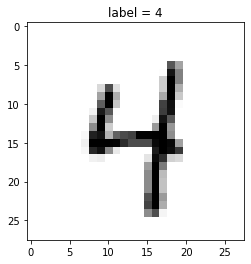

In [28]:
record =19
mnist_test_dataset.plot_image(record)

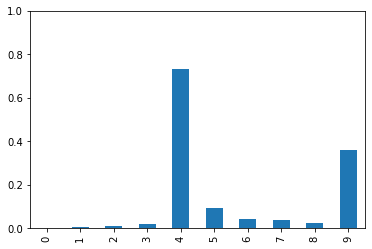

In [30]:
score = 0
items =0
image_data = mnist_test_dataset[record][1]
output =C.forward(image_data)
pandas.DataFrame(output.detach().numpy()).plot(kind='bar',legend=False,ylim=(0,1))


In [32]:
score = 0
items = 0
for label,image_data_tensor,target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if(answer.argmax()==label):
    score +=1
    pass
  items +=1

  pass

print(score,items,score/items)


8640 10000 0.864


# **성능 향상 기법**

In [60]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(784,200),
        nn.LeakyReLU(0.02),
        nn.LayerNorm(200),
        nn.Linear(200,10),
        nn.Sigmoid()
    )

    self.loss_function = nn.BCELoss()

    self.optimiser = torch.optim.Adam(self.parameters())
    
    self.counter=0
    self.progress =[]
    
    pass

  def forward(self, inputs):
    return self.model(inputs)

  def train(self,inputs,targets):
    outputs = self.forward(inputs)
    loss = self.loss_function(outputs,targets)
   
    
    self.counter +=1
    if(self.counter %10 ==0):
      self.progress.append(loss.item())
      pass
    if(self.counter %10000 ==0):
      print("counter=",self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    
    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))
    pass


  pass


In [61]:
C=Classifier()

In [62]:
%%time

epochs = 3

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label,image_data_tensor,target_tensor in mnist_dataset:
    C.train(image_data_tensor,target_tensor)
    pass
  pass

training epoch 1 of 3
counter= 10000
counter= 20000
counter= 30000
counter= 40000
counter= 50000
counter= 60000
training epoch 2 of 3
counter= 70000
counter= 80000
counter= 90000
counter= 100000
counter= 110000
counter= 120000
training epoch 3 of 3
counter= 130000
counter= 140000
counter= 150000
counter= 160000
counter= 170000
counter= 180000
CPU times: user 11min 37s, sys: 6.65 s, total: 11min 44s
Wall time: 11min 43s


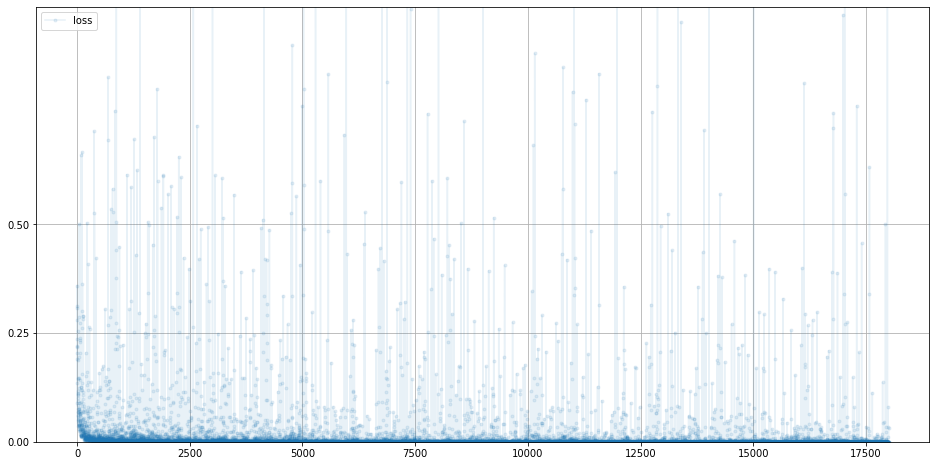

In [63]:
C.plot_progress()

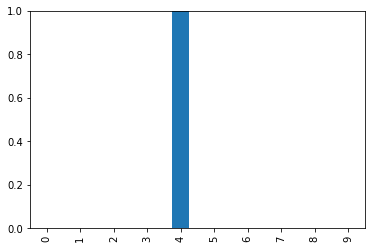

In [64]:
score = 0
items =0
image_data = mnist_test_dataset[record][1]
output =C.forward(image_data)
pandas.DataFrame(output.detach().numpy()).plot(kind='bar',legend=False,ylim=(0,1))
